In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit
def decDRC(c, kd, h=1, Max=1, Min=0):
    top=(c**h)
    bot=(c**h)+(kd**h)
    res = 1-(top/bot)
    res = (Max-Min)*res + Min
    return res

# Generate example data
x = np.array([0.0003,0.001,0.003,0.01,0.177])
y = np.array([1.664189298,0.814404835,0.837508998,0.783916765,1])
error = np.array([0.3,0.274420398,0.232759937,0.262154606,0.060254655])

#initial kd, h, max, min
start=(0.003,1,1.4,0.6)

#Constraints kd, h, max, min : kd, h, max, min
bounds=([0.0001, 1, 1, 0.6], [0.01, 1.5, 1.7, 1.0])

# Fit the curve
popt, pcov = curve_fit(decDRC, x, y, sigma=error/y, p0=start, bounds=bounds)

popt


array([5.86316957e-04, 1.50000000e+00, 1.70000000e+00, 9.80678599e-01])

In [58]:
# Extract the optimized parameters
kd_fit, h_fit, Max_fit, Min_fit = popt

# Generate x values for the fitted curve
x_new = np.logspace(-6, 0, 100)
y_fit = decDRC(x_new, kd_fit, h_fit, Max_fit, Min_fit)

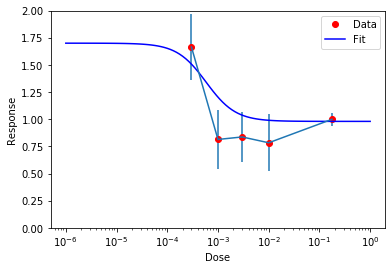

In [59]:
# Plot the data and the fitted curve
plt.plot(x, y, 'ro', label='Data')
plt.plot(x_new, y_fit, 'b-', label='Fit')
plt.errorbar(x, y, yerr=error)
plt.xscale("log")
plt.ylim([0,2])
plt.xlabel('Dose')
plt.ylabel('Response')
plt.legend()
plt.show()